In [1]:
import numpy

In [17]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
pwd #import crap with this

u'C:\\Users\\mps27\\Documents'

$$ Making-Matricies $$

In [3]:
from numpy import array,float
a=array([[2.0,1.0],[3.0,4.0]])
print(a)

[[ 2.  1.]
 [ 3.  4.]]


In [4]:
b=(numpy.zeros((2,2)))
print (b)

[[ 0.  0.]
 [ 0.  0.]]


In [5]:
c=(numpy.arange(10,20,2))
print (c)

[10 12 14 16 18]


In [6]:
d = numpy.linspace(0,8,9).reshape(3,3)
print(d)

[[ 0.  1.  2.]
 [ 3.  4.  5.]
 [ 6.  7.  8.]]


In [7]:
d[0]=[2,3,5]    # Change a row
d[1,1]=6        # Change an element
d[2,0:2]=[8,-3] # Change part of a row
print(d)

[[ 2.  3.  5.]
 [ 3.  6.  5.]
 [ 8. -3.  8.]]


$$ Creating-matricies-of-functions $$

In [19]:
def f(x):
  return x**3     # sample function

n = 5           # no of points in [0,1]
dx = 1.0/(n-1)  # x spacing
xlist = [i*dx for i in range(n)]
ylist = [f(x) for x in xlist]

In [20]:
import numpy as np
x2 = np.array(xlist)
y2 = np.array(ylist)
print(x2,y2)

(array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ]), array([ 0.      ,  0.015625,  0.125   ,  0.421875,  1.      ]))


In [21]:
n = 5                     # number of points
x3 = np.linspace(0, 1, n) # n points in [0, 1]
y3 = np.zeros(n)          # n zeros (float data type)
for i in xrange(n):
     y3[i] = f(x3[i])
print(x3,y3)

(array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ]), array([ 0.      ,  0.015625,  0.125   ,  0.421875,  1.      ]))


In [22]:
from numpy.linalg import inv,solve
print(inv(A)) # Matrix inverse
print(solve(A,b)) # Solve the system of equations [A]{x} = {b}

NameError: name 'A' is not defined

$$ Plotting $$

In [34]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
def f(x):
    return x**2
dx = 1
x0 = [i*dx for i in range (-5,6)]
y = [f(x) for x in x0]

In [40]:
x1 = np.array(x0)
y1 = np.array(y)
print (x1,y1)

(array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5]), array([25, 16,  9,  4,  1,  0,  1,  4,  9, 16, 25]))


$$ Fitting-data-to-graphs $$

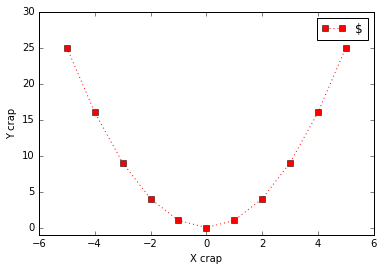

In [53]:
plt.plot(x1,y1,':rs') #:rs = dotted red squares
plt.xlabel("X crap")
plt.ylabel("Y crap")
plt.axis([-6,6,-1,30])
plt.legend('$$')
plt.show()

$$ Plotting:Ae^{-kx}*cos(2pi*nu*x) $$

In [54]:
#parameters
A, nu, k = 10, 4, 2

#function for creating the data points to be interpolated
def f(x, A, nu, k):
    return A * np.exp(-k*x) * np.cos(2*np.pi * nu * x)

#create the data points to be interpolated
xmax, nx = 0.5, 8 
x = np.linspace(0, xmax, nx) #(starting point, end point, number of points)
y = f(x, A, nu, k)  #X and Y are the data points

In [55]:
#Polynomial Fit
#generate the points where we want to evaluate the interpolating functions
x0 = np.linspace(0, xmax, 100)

#polynomial interpolation - this gives vector y where the polynomial is already evaluated
y0 = barycentric_interpolate(x, y, x0) #X0 and Y0 are polynomial fitted data

In [56]:
# splines: linear and cubic
f_linear  = interp1d(x, y)
f_cubic   = interp1d(x, y, kind='cubic')

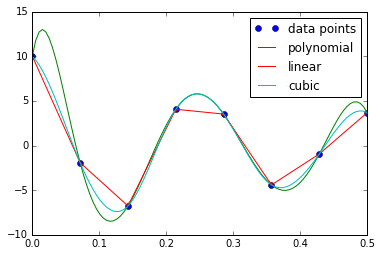

In [57]:
#plot all results and the original data
pylab.plot(x, y, 'o', label='data points')

pylab.plot(x0, y0, label='polynomial')

pylab.plot(x0, f_linear(x0), label='linear')

pylab.plot(x0, f_cubic(x0), label='cubic')

pylab.legend()
pylab.show()

$$ Solving-Equations $$

In [59]:
pwd


u'C:\\Users\\mps27\\Documents'

In [60]:
from bisection import *
from ridder import *

In [61]:
# Import the required modules
import numpy as np
import pylab as pl
import scipy as sci
from scipy import optimize
from newtonRaphson import *

In [62]:
# First set up the system of equations - note that it is a vector of equations!
def f(x):
    return np.array([x[0]**2+x[1]**2-3,x[0]*x[1]-1])
# Initial guess for the roots (e.g. from plotting the two functions) - again a vector
x0=np.array([0.5,1.5])

In [63]:
roots_solve=sci.optimize.fsolve(f,x0)
print(roots_solve)

[ 0.61803399  1.61803399]


$$ Intergrating $$

In [64]:
import scipy
from scipy import integrate
from pylab import *
from scipy import interpolate, optimize
from numpy import *

In [65]:
def f(t):
    return -t**(2.0)+(3.0)*t+3.0

In [66]:
from trapezoid import *
from romberg import *

In [67]:
scipy.integrate.romberg(f,-4.0,3.0)

-19.833333333333332

In [68]:
scipy.integrate.quad(f,-4.0,3.0)

(-19.833333333333336, 5.492400699398068e-13)

In [69]:
#Trapezoid method example
r = zeros(21) # we will be storing the results here
r[1] = trapezoid(f,1.0,3.0,1.0,3) # first call is special, since no  
                                            # result to be refined yet exists
for k in range(2,21):
    r[k] = trapezoid(f,-4.0,3.0,r[k-1],k) # refinements of the answer using ever more points 
    
result=r[20]
print('Trapezoid method result: ',result)

('Trapezoid method result: ', -19.833176454127965)


In [81]:
scipy.integrate.dblquad(f,-4.0,3.0,lambda x:0,lambda x:x**2) #wut how work wut

(-6944.194444444447, 7.709797157483647e-11)

$$ Solving-Differential-Equations $$

In [73]:
from printSoln import *
from run_kut4 import *
import pylab as pl

In [74]:
# First set up the right-hand side RHS) of the equation
def f(x,y):
    f=zeros(1)            # sets up RHS as a vector (here of just one element)
    f[0]=y[0]*(1.0-y[0])  # RHS; note that y is also a vector
    return f


        x         y[ 0 ] 
   0.0000e+00    1.0000e-01
   1.0000e+00    2.3197e-01
   2.0000e+00    4.5085e-01
   3.0000e+00    6.9057e-01
   4.0000e+00    8.5849e-01
   5.0000e+00    9.4283e-01


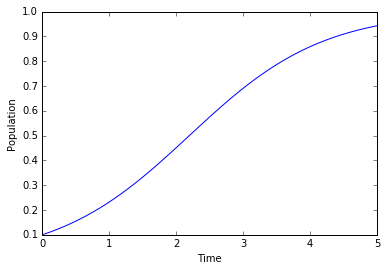

In [76]:
# For solving a first order differential equation
# Example: using Runge-Kutta of 4th order
x = 0.0 #Integration Start Limit
xStop = 5.0 #Integration End Limit

y = array([0.1]) # Initial value of

h = 0.001 # Step size
freq = 1000 # Printout frequency - print the result every 1000 steps

X,Y = integrate(f,x,y,xStop,h) # call the RK4 solver
printSoln(X,Y,freq)            # Print the solution (code on SD)

pl.plot(X,Y[:,0])              # Plot the solution
pl.xlabel('Time')
pl.ylabel('Population')
pl.show()

In [77]:
# For solving a first order differential equation
# Same example equation solved with the internal solver

# First set up the right-hand side RHS) of the equation
# NOTE THE DIFFERENT ORDER OF THE FUNCTION ARGUMENTS COMPARED TO ABOVE
def g(y,x):
    g=zeros(1)            # sets up RHS as a vector 
    g[0]=y[0]*(1.0-y[0])  # RHS; note that y is also a vector
    return g

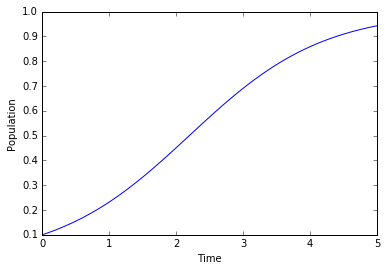

In [78]:
x=np.linspace(0,5,100) # where do we want the solution

y0=array([0.1])        # initial condition

z=scipy.integrate.odeint(g,y0,x) # call the solver
z=z.reshape(np.size(x))          # reformat the answer

pl.plot(x,z)              # Plot the solution
pl.xlabel('Time')
pl.ylabel('Population')
pl.show()


        x         y[ 0 ]        y[ 1 ] 
   0.0000e+00    1.0000e-01    3.0000e-02
   1.0000e+00    2.6454e-01    4.8052e-03
   2.0000e+00    7.1571e-01    1.0230e-03
   3.0000e+00    1.9430e+00    4.7308e-04
   4.0000e+00    5.2735e+00    1.7999e-03
   5.0000e+00    1.0558e+01    1.3727e+00
   6.0000e+00    5.9415e-02    1.4783e+00
   7.0000e+00    4.4089e-02    2.0868e-01
   8.0000e+00    9.9717e-02    3.0180e-02
   9.0000e+00    2.6375e-01    4.8316e-03
   1.0000e+01    7.1355e-01    1.0272e-03


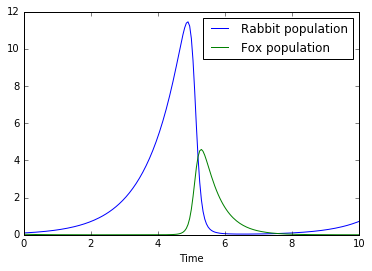

In [79]:
# For solving two interlinked differential equations
# Define right-hand sides of equations (into a vector!). 
# 'y', containing all functions to be solved for, is also a vector 
def F(x,y,a=1.0,b=2.0,c=1.0,d=2.0):
    F = zeros(2)
    F[0] = y[0]*(a-b*y[1])
    F[1] = y[1]*(c*y[0]-d)
    return F

x = 0.0 # Start of integration
xStop = 10.0 # End of integration
y = array([0.1, 0.03]) # Initial values of {y}
h = 0.05 # Step size
freq = 20 # Printout frequency
X,Y = integrate(F,x,y,xStop,h)
printSoln(X,Y,freq)
pl.plot(X,Y[:,0],label='Rabbit population')
pl.plot(X,Y[:,1],label='Fox population')
pl.xlabel('Time')
pl.legend()
pl.show()

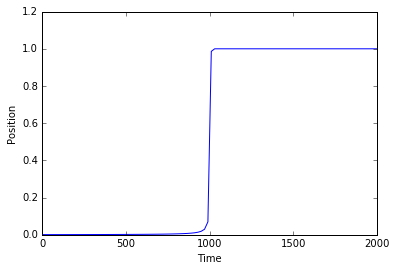

In [80]:
# Define the right hand side
def f(y,t):
    return y**2-y**3

# Parameter
delta=0.001
# Where do we want the solution?
x=np.linspace(0,2./delta,100)
# Call the solver
z=scipy.integrate.odeint(f,delta,x)
z=z.reshape(np.size(x))          # reformat the answer

pl.plot(x,z)              # Plot the solution
pl.xlabel('Time')
pl.ylabel('Position')
pl.show()